### Polymod - matrix of contacts

we download the matrix with avg number of contacts per day of the partecipants divided into age groups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
which_poly = "7_poolNo"

In [13]:
if which_poly != "7_pool":
    Polymod_data = pd.read_csv("./Physical_Contacts_Polymod.csv", header = 1, index_col = 0)
    Polymod_data.rename(columns={'00-04': '0-4', '|05-09|': '5-9', '|70+|': '70+'}, 
                        index={'00-04': '0-4', '|05-09|': '5-9', '|70+|': '70+'}, inplace = True)
else:
    Polymod_data = pd.read_csv("./Poly_7.csv", header = 0, index_col = 0)
    Polymod_data = Polymod_data.iloc[np.hstack([6, np.arange(0,6)]),:]

The columns are the age classes of the partecipants

In [14]:
Polymod_data

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+
age of contact,,,,,,,,,,,,,,,
0-4,1.49,0.59,0.25,0.18,0.42,0.61,0.57,0.74,0.18,0.20,0.36,0.15,0.18,0.26,0.07
5-9,0.74,3.82,0.53,0.44,0.37,0.42,0.68,0.99,0.66,0.15,0.17,0.19,0.41,0.30,0.07
10-14,0.36,0.73,3.19,0.79,0.17,0.14,0.32,0.51,0.69,0.27,0.20,0.19,0.17,0.26,0.17
15-19,0.26,0.22,0.52,3.10,0.85,0.12,0.17,0.29,0.48,0.51,0.27,0.13,0.09,0.26,0.37
20-24,0.39,0.19,0.09,0.38,1.32,0.49,0.28,0.16,0.23,0.44,0.20,0.28,0.11,0.15,0.00
25-29,0.53,0.37,0.11,0.20,0.58,0.64,0.35,0.21,0.23,0.25,0.30,0.30,0.20,0.04,0.03
30-34,0.77,0.72,0.29,0.17,0.31,0.42,0.80,0.21,0.27,0.38,0.23,0.20,0.23,0.15,0.07
35-39,0.73,0.65,0.61,0.35,0.20,0.24,0.47,0.76,0.47,0.29,0.18,0.11,0.32,0.04,0.03
40-44,0.38,0.59,0.58,0.47,0.27,0.29,0.25,0.49,0.45,0.40,0.12,0.19,0.23,0.15,0.30


In [15]:
t_poly = pd.DataFrame(Polymod_data.transpose());

In [16]:
t_poly.columns.name = "Age of Partecipant"

In [17]:
t_poly
polymod_mat =  t_poly.as_matrix()
#Reverse
polymod_mat_rot = np.rot90(polymod_mat)

/home/fbasini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Age class of contacts')

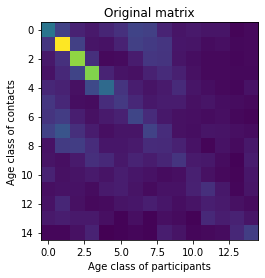

In [18]:
plt.imshow(t_poly)
plt.title("Original matrix")
plt.xlabel("Age class of participants")
plt.ylabel("Age class of contacts")

In [19]:
Classes_ticks = t_poly.columns.tolist()

if which_poly != "7_pool":
    #Distorting values to make colors heatmap
    Distorted_poly = np.where(polymod_mat_rot >3, polymod_mat_rot/3,polymod_mat_rot)

    Distorted_poly = np.where(False, polymod_mat_rot, np.exp( Distorted_poly/200))
else:
    Distorted_poly = np.where(polymod_mat_rot >3, polymod_mat_rot/3,polymod_mat_rot)

    Distorted_poly = np.where(False, polymod_mat_rot, np.exp( Distorted_poly/10))

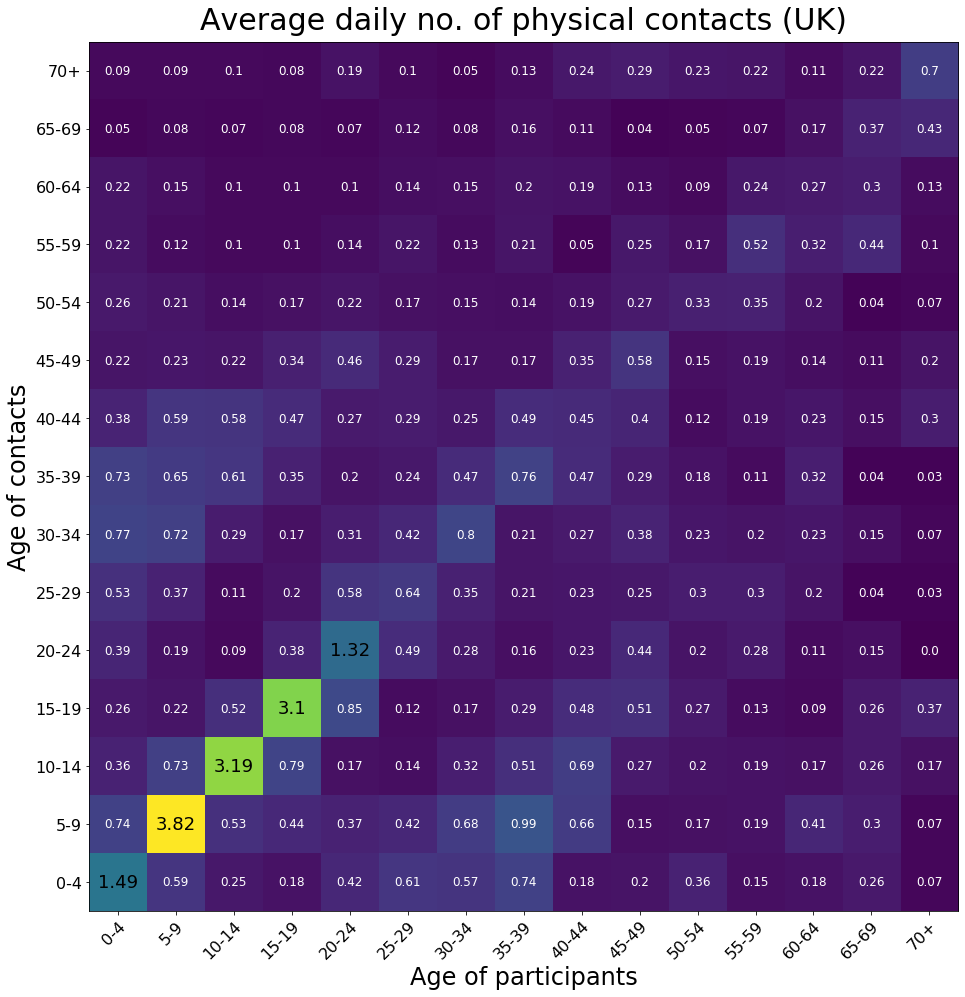

In [20]:
fig, ax = plt.subplots(figsize = (16,16))
im = ax.imshow(polymod_mat_rot)

# We want to show all ticks...
ax.set_xticks(np.arange(len(Classes_ticks)))
ax.set_yticks(np.arange(len(Classes_ticks)))
# ... and label them with the respective list entries
ax.set_xticklabels(Classes_ticks, fontsize=16)
ax.set_yticklabels(np.flip(Classes_ticks), fontsize=16)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
for i in range(len(Classes_ticks)):
    for j in range(len(Classes_ticks)):
        if polymod_mat_rot[i, j]>1:
            text = ax.text(j, i, np.round(polymod_mat_rot[i, j], 2),
                       ha="center", va="center", color="black", fontsize=18)
        else:
            text = ax.text(j, i, np.round(polymod_mat_rot[i, j], 2), ha="center", va="center", color="w", fontsize=12)
ax.set_xlabel("Age of participants", fontsize = 24)
ax.set_ylabel("Age of contacts", fontsize = 24)
ax.set_title("Average daily no. of physical contacts (UK)", fontsize = 30, pad = 12)
#plt.savefig("Polymod_heatmap.svg")
if which_poly != "7_pool":
    plt.savefig("Polymod_heatmap_7.png")
else:
    plt.savefig("Polymod_heatmap.png")

Contact matrix of all reported contacts in Great Britain consisting of the average number of contact persons recorded per day per survey participant 